## Effect of System Stability on Optimal Objective Values

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import differential_evolution
from scipy.linalg import solve_continuous_are
from numpy.linalg import pinv
from scipy.integrate import solve_ivp
from scipy.linalg import expm, pinv
import sympy as sp

## Discrete Time 

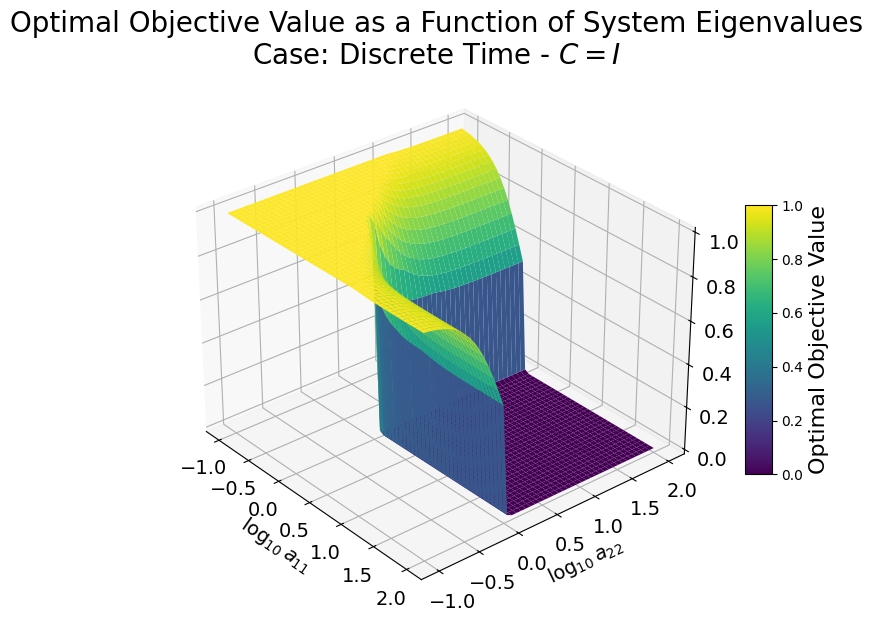

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the objective function
def objective(tau1, tau2, a11, a22):
    return 1 / (a11**(2 * tau1) + a11**(2 * tau2)) + 1 / (a22**(2 * tau1) + a22**(2 * tau2))

# Bounds for tau
tau_min, tau_max = 0, 20

# Range for a11 and a22 (log-spaced)
a11_values = np.logspace(-1, 2, 50)  # Log-spaced values from 0.1 to 100
a22_values = np.logspace(-1, 2, 50)  

A11, A22 = np.meshgrid(a11_values, a22_values)
Z = np.zeros_like(A11)

# Grid search over a11 and a22
for i in range(A11.shape[0]):
    for j in range(A11.shape[1]):
        a11 = A11[i, j]
        a22 = A22[i, j]
        
        # Grid search over tau1, tau2
        best_value = float('inf')
        for tau1 in range(tau_min, tau_max + 1):
            for tau2 in range(tau_min, tau_max + 1):
                obj_value = objective(tau1, tau2, a11, a22)
                if obj_value < best_value:
                    best_value = obj_value

        Z[i, j] = best_value  #best objective


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Convert A11 and A22 to log10 scale
log_A11 = np.log10(A11)
log_A22 = np.log10(A22)

# Plot 
surf = ax.plot_surface(log_A11, log_A22, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel(r"$\log_{10} a_{11}$", fontsize=14)
ax.set_ylabel(r"$\log_{10} a_{22}$", fontsize=14)

ax.set_title("Optimal Objective Value as a Function of System Eigenvalues\nCase: Discrete Time - $C = I$", fontsize=20, pad=0)
ax.view_init(elev=30, azim=-40)  # angle of view
ax.tick_params(axis='both', which='major', labelsize=14)

# Color bar
cbar= fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Optimal Objective Value", fontsize=16)
plt.savefig("plots/OBJ_DT_I.pdf")
plt.show()


<>:66: SyntaxWarning: invalid escape sequence '\q'
<>:66: SyntaxWarning: invalid escape sequence '\q'
C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_37132\1088115535.py:66: SyntaxWarning: invalid escape sequence '\q'
  ax.set_title("Optimal Objective Value as a Function of System Eigenvalues\nCase: Discrete Time - $C = (1 \quad 1)$", fontsize=20, pad=0)


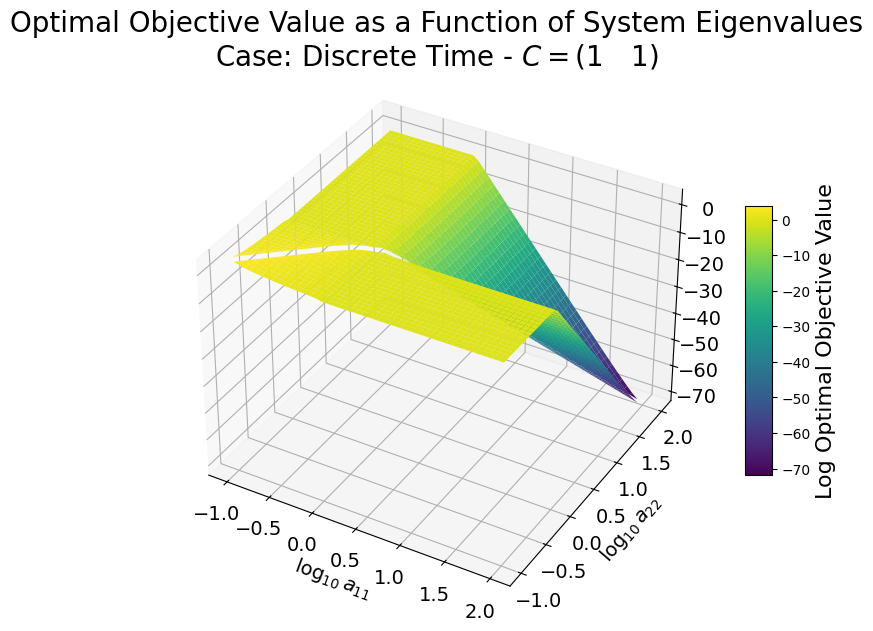

In [ ]:
def objective(tau1, tau2, a11, a22):
    num = a11**(2 * tau1) + a11**(2 * tau2) + a22**(2 * tau1) + a22**(2 * tau2)
    
    denum = (a11**(2 * tau1) * a22**(2 * tau2) + 
             a11**(2 * tau2) * a22**(2 * tau1) - 
             2 * a11**(tau1 + tau2) * a22**(tau1 + tau2))
    
    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.where(tau1 != tau2 and abs(a11 - a22 )>=0.001, num / denum, np.nan)
    
    return result

# Bounds for tau
tau_min, tau_max = 0, 20

# Range for a11 and a22 (log-spaced)
a11_values = np.logspace(-1, 2, 50)  # Log-spaced values from 0.1 to 100
a22_values = np.logspace(-1, 2, 50)  

A11, A22 = np.meshgrid(a11_values, a22_values)
Z = np.zeros_like(A11)

# Grid search over a11 and a22
for i in range(A11.shape[0]):
    for j in range(A11.shape[1]):
        a11 = A11[i, j]
        a22 = A22[i, j]
        
        # Grid search over tau1, tau2
        best_value = float('inf')
        for tau1 in range(tau_min, tau_max + 1):
            for tau2 in range(tau_min, tau_max + 1):
                obj_value = objective(tau1, tau2, a11, a22)
                if obj_value < best_value:
                    best_value = obj_value

        Z[i, j] = best_value  #best objective value


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
log_A11 = np.log10(A11)
log_A22 = np.log10(A22)

log_Z= np.log10(Z)
# log_Z= Z

# Plot 
surf = ax.plot_surface(log_A11, log_A22, log_Z, cmap='viridis', edgecolor='none')

# Labels
ax.set_xlabel(r"$\log_{10} a_{11}$", fontsize=14)
ax.set_ylabel(r"$\log_{10} a_{22}$", fontsize=14)

ax.set_title("Optimal Objective Value as a Function of System Eigenvalues\nCase: Discrete Time - $C = (1 \quad 1)$", fontsize=20, pad=0)
ax.view_init(elev=35, azim=-60) 
ax.tick_params(axis='both', which='major', labelsize=14)
# Color bar
cbar=fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Log Optimal Objective Value", fontsize=16)

plt.savefig("plots/OBJ_DT_11.pdf")
plt.show()


## Continuous Time 

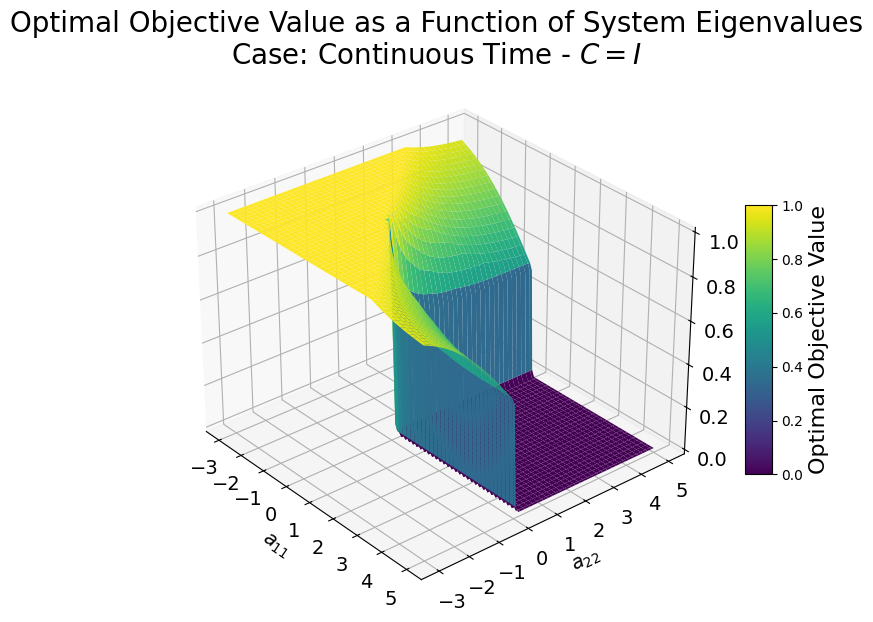

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the objective function
def objective(tau1, tau2, a11, a22):
    return 1/(np.exp(a11*2*tau1) + np.exp(a11*2*tau2)) + 1/(np.exp(a22*2*tau1) + np.exp(a22*2*tau2))

# Bounds for tau
tau_min, tau_max = 0, 20
tau_range= np.linspace(tau_min, tau_max, 50)

# Range for a11 and a22
a11_values = np.linspace(-3,5,100)
a22_values = np.linspace(-3,5,100)
A11, A22 = np.meshgrid(a11_values, a22_values)
Z = np.zeros_like(A11)

# Grid search over a11 and a22
for i in range(A11.shape[0]):
    for j in range(A11.shape[1]):
        a11 = A11[i, j]
        a22 = A22[i, j]
        
        # Grid search over tau1, tau2
        best_value = float('inf')
        for tau1 in tau_range:
            for tau2 in tau_range:
                obj_value = objective(tau1, tau2, a11, a22)
                if obj_value < best_value:
                    best_value = obj_value

        Z[i, j] = best_value  # Store the best objective value


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
log_A11 = A11
log_A22 = A22

# Plot 
surf = ax.plot_surface(log_A11, log_A22, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel(r"$a_{11}$", fontsize=14)
ax.set_ylabel(r"$a_{22}$", fontsize=14)

ax.set_title("Optimal Objective Value as a Function of System Eigenvalues\nCase: Continuous Time - $C = I$", fontsize=20, pad=0)
ax.view_init(elev=30, azim=-40)  
ax.tick_params(axis='both', which='major', labelsize=14)

# Color bar
cbar= fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Optimal Objective Value", fontsize=16)
plt.savefig("plots/OBJ_CT_I.pdf")
plt.show()


<>:67: SyntaxWarning: invalid escape sequence '\q'
<>:67: SyntaxWarning: invalid escape sequence '\q'
C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_37132\2707583280.py:67: SyntaxWarning: invalid escape sequence '\q'
  ax.set_title("Optimal Objective Value as a Function of System Eigenvalues\nCase: Continuous Time - $C = (1 \quad 1)$", fontsize=20, pad=0)


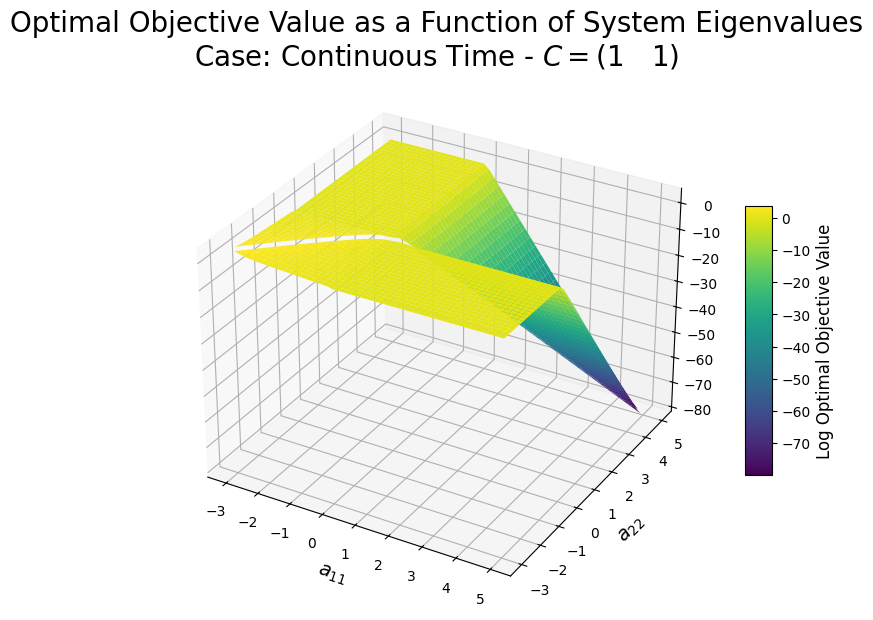

In [ ]:
def objective(tau1, tau2, a11, a22):
    num = np.exp(a11*2*tau1) + np.exp(a11*2*tau2) + np.exp(a22*2*tau1) + np.exp(a22*2*tau2)
    
    denum = (np.exp(a11*tau1 + a22*tau2) - np.exp(a11*tau2 + a22*tau1))**2 
    
    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.where(tau1 != tau2, num / denum, np.nan)
    
    return result

# Bounds for tau
tau_min, tau_max = 0, 20
tau_range= np.linspace(tau_min, tau_max, 50)

# Range for a11 and a22 
a11_values = np.linspace(-3,5,50)
a22_values = np.linspace(-3,5,50)

A11, A22 = np.meshgrid(a11_values, a22_values)
Z = np.zeros_like(A11)

# Grid search over a11 and a22
for i in range(A11.shape[0]):
    for j in range(A11.shape[1]):
        a11 = A11[i, j]
        a22 = A22[i, j]
        
        # Grid search over tau1, tau2
        best_value = float('inf')
        for tau1 in tau_range:
            for tau2 in tau_range:
                obj_value = objective(tau1, tau2, a11, a22)
                if obj_value < best_value:
                    best_value = obj_value

        Z[i, j] = best_value  #best objective value


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
log_A11 = A11
log_A22 = A22
log_Z= np.log10(Z)
# log_Z= Z

# Plot 
surf = ax.plot_surface(log_A11, log_A22, log_Z, cmap='viridis', edgecolor='none')

# Labels
ax.set_xlabel(r"$a_{11}$", fontsize=14)
ax.set_ylabel(r"$a_{22}$", fontsize=14)

ax.set_title("Optimal Objective Value as a Function of System Eigenvalues\nCase: Continuous Time - $C = (1 \quad 1)$", fontsize=20, pad=0)
ax.view_init(elev=30, azim=-60)  

# Color bar
cbar=fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Log Optimal Objective Value", fontsize=12)
plt.savefig("plots/OBJ_CT_11.pdf")
plt.show()